X and Y are the input and output training data. For example, when X = 1, the expected output is Y = 2, and so on. This represents a simple linear relationship where Y = 2 * X.

In [1]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
print (X)


tensor([[1.],
        [2.],
        [3.],
        [4.]])


In [2]:
print (X.shape)
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32) 
#X_test is the test input, which we want to predict after the model is trained.



torch.Size([4, 1])
#samples: 4, #features: 1


Here, nn.Linear(input_size, output_size) defines a linear model where the relationship between input X and output Y is modeled as: f(X) = wX + b

In [3]:
# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 1.639


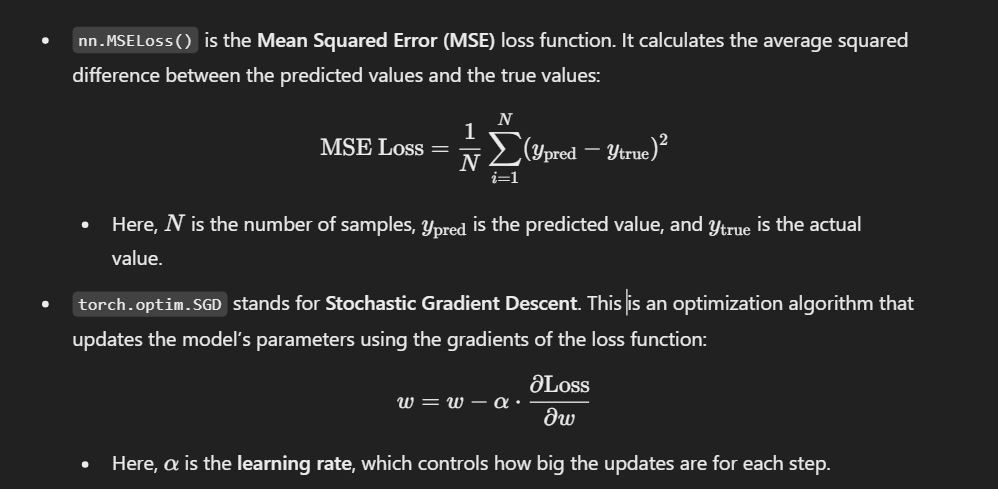

In [4]:
# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [5]:
# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  0.4594365358352661  loss =  tensor(19.2455, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.4697917699813843  loss =  tensor(0.6598, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.6406484842300415  loss =  tensor(0.1695, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.676226258277893  loss =  tensor(0.1480, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.689805269241333  loss =  tensor(0.1390, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.6996139287948608  loss =  tensor(0.1309, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.7085909843444824  loss =  tensor(0.1233, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.7172155380249023  loss =  tensor(0.1161, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.7255715131759644  loss =  tensor(0.1094, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.7336782217025757  loss =  tensor(0.1030, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.466
